In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/resume_screening_NLP/UpdatedResumeDataSet.csv')

In [3]:
raw_df.shape

(962, 2)

In [4]:
raw_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
raw_df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

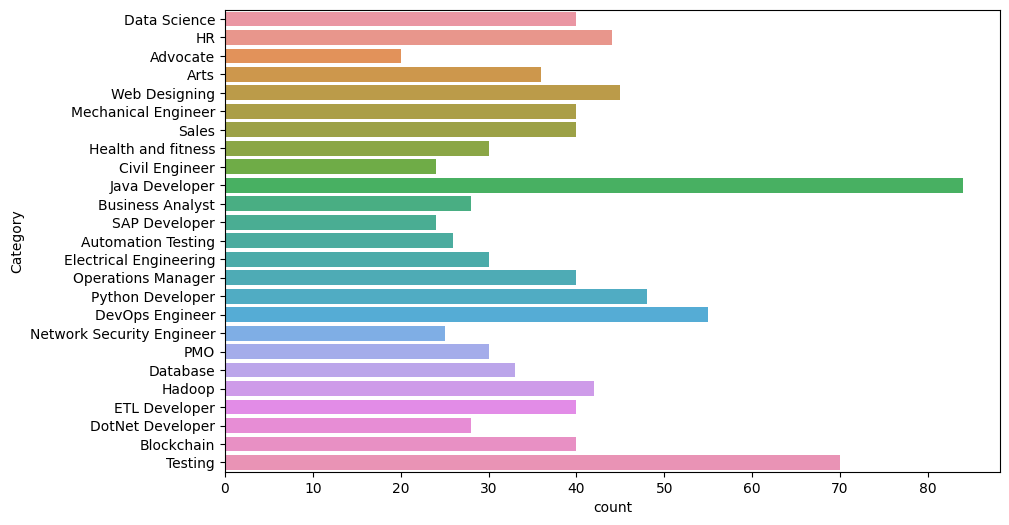

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(y ='Category', data = raw_df)
plt.show()

In [7]:
raw_df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
raw_df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [9]:
df = raw_df.copy()

In [10]:
import re

def cleanResume(text):
    pattern = r'[^a-zA-Z0-9\s]'
    cleantext = re.sub(pattern, '', text)
    cleantext = re.sub(r'\n|\r', '', cleantext)

    return cleantext


In [11]:
df['Resume'] = df['Resume'].apply(cleanResume)

In [12]:
df['Resume']

0      Skills  Programming Languages Python pandas nu...
1      Education Details May 2013 to May 2017 BE   UI...
2      Areas of Interest Deep Learning Control System...
3      Skills  R  Python  SAP HANA  Tableau  SAP HANA...
4      Education Details  MCA   YMCAUST  Faridabad  H...
                             ...                        
957    Computer Skills  Proficient in MS office Word ...
958     Willingness to accept the challenges  Positiv...
959    PERSONAL SKILLS  Quick learner  Eagerness to l...
960    COMPUTER SKILLS  SOFTWARE KNOWLEDGE MSPower Po...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

In [13]:
df['Resume'][0]

'Skills  Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery  Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA  Neural Nets  Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau  Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision  Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate  Ernst  Young LLPSkill Details JAVASCRIPT Exprience  24 monthsjQuery Exprience  24 monthsPython Exprience  24 monthsCompany Details company  Ernst  Young LLPdescription  Fraud Investigations and Dispute Services   AssuranceTECHNOLOGY ASSISTED REVIEWTAR Technology Assisted Review assists in accelerating

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [16]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas nu...
1,6,Education Details May 2013 to May 2017 BE UI...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA...
4,6,Education Details MCA YMCAUST Faridabad H...


In [17]:
# Access the mapping of labels to categories
label_to_category = dict(zip(le.transform(le.classes_), le.classes_))

# Print the mapping
for label, category in label_to_category.items():
    print(f"Label {label} corresponds to Category '{category}'")

Label 0 corresponds to Category 'Advocate'
Label 1 corresponds to Category 'Arts'
Label 2 corresponds to Category 'Automation Testing'
Label 3 corresponds to Category 'Blockchain'
Label 4 corresponds to Category 'Business Analyst'
Label 5 corresponds to Category 'Civil Engineer'
Label 6 corresponds to Category 'Data Science'
Label 7 corresponds to Category 'Database'
Label 8 corresponds to Category 'DevOps Engineer'
Label 9 corresponds to Category 'DotNet Developer'
Label 10 corresponds to Category 'ETL Developer'
Label 11 corresponds to Category 'Electrical Engineering'
Label 12 corresponds to Category 'HR'
Label 13 corresponds to Category 'Hadoop'
Label 14 corresponds to Category 'Health and fitness'
Label 15 corresponds to Category 'Java Developer'
Label 16 corresponds to Category 'Mechanical Engineer'
Label 17 corresponds to Category 'Network Security Engineer'
Label 18 corresponds to Category 'Operations Manager'
Label 19 corresponds to Category 'PMO'
Label 20 corresponds to Categ

In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Resume'] = df['Resume'].apply(remove_stopwords)

In [20]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 May 2017 UITRGPVDat...
2      Areas Interest Deep Learning Control System De...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient MS office Word Basi...
958    Willingness accept challenges Positive thinkin...
959    PERSONAL SKILLS Quick learner Eagerness learn ...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MSPower Poi...
961    Skill Set OS Windows XP788110 Database MYSQL s...
Name: Resume, Length: 962, dtype: object

In [21]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLPSkill Details JAVASCRIPT Exprience 24 monthsjQuery Exprience 24 monthsPython Exprience 24 monthsCompany Details company Ernst Young LLPdescription Fraud Investigations Dispute Services AssuranceTECHNOLOGY ASSISTED REVIEWTAR Technology Assisted Review assists accelerating review process run analytics 

In [22]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [23]:
def lemmatize(text):
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  lemmatized_text = ' '.join(lemmatized_words)

  return lemmatized_text

In [24]:
df['Resume'] = df['Resume'].apply(lemmatize)

In [25]:
df['Resume'][0]

'Skills Programming Languages Python panda numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting technique Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLPSkill Details JAVASCRIPT Exprience 24 monthsjQuery Exprience 24 monthsPython Exprience 24 monthsCompany Details company Ernst Young LLPdescription Fraud Investigations Dispute Services AssuranceTECHNOLOGY ASSISTED REVIEWTAR Technology Assisted Review assist accelerating review process run analytics gen

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

tfidf.fit(df['Resume'])

tfidf_matrix = tfidf.transform(df['Resume'])

In [27]:
tfidf_matrix

<962x9531 sparse matrix of type '<class 'numpy.float64'>'
	with 171572 stored elements in Compressed Sparse Row format>

In [28]:
feature_names = tfidf.get_feature_names_out()


In [29]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)


In [30]:
tfidf_df.shape

(962, 9531)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.2, random_state=24)

In [32]:
X_train.shape

(769, 9531)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())

clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
y_pred = clf.predict(X_test)

In [36]:
y_pred

array([22, 10, 16,  1,  6, 15, 10,  9,  6,  1, 11,  1, 22, 23, 24, 20, 21,
       23, 24, 10, 24, 22, 22,  5, 10, 18,  2, 23, 20, 17, 12, 20, 13, 22,
       15, 11, 23, 14, 20, 20, 12,  3, 15, 18, 23,  4,  1, 15, 23, 18, 15,
        9, 21, 14, 11, 16, 20, 19, 18, 11,  5,  8, 19,  1, 10, 16, 11, 21,
        5, 16, 23,  1,  1, 15, 24,  4, 17,  7, 20,  3, 21, 23, 10, 23, 15,
       10, 23,  7,  8, 23,  8, 14, 14,  6, 18, 17, 23, 10, 13, 15, 22, 15,
       18, 20,  3,  9, 20,  8, 16, 11,  8, 24, 18, 21, 11, 15,  9, 15, 13,
       16,  1,  8, 15,  8, 24, 13, 14, 12,  7, 19, 14,  1, 16,  9, 19, 10,
       11,  3,  8, 15, 22, 19, 15, 23,  3, 17,  2,  2, 14, 19,  8, 20, 11,
       12,  7, 19, 22, 13, 24,  3, 24,  9, 14,  3, 10,  1, 19, 22, 13, 15,
       17,  0, 18, 15,  6, 21, 24, 20, 17,  8,  3, 11,  4,  2,  7, 20,  7,
        3, 20,  0,  1, 21, 24])

In [37]:
accuracy_score(y_test, y_pred)

0.9430051813471503

In [38]:
from sklearn.metrics import f1_score

In [39]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.82      1.00      0.90         9
           2       1.00      0.67      0.80         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00        10
          11       0.80      1.00      0.89         8
          12       0.50      0.33      0.40         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00         7
          17       1.00    

In [40]:
# import pickle
# tfidf_path = '/content/drive/MyDrive/resume_screening_NLP/tfidf.pkl'
# pickle.dump(tfidf, open(tfidf_path, "wb"))

In [41]:
# model_path = '/content/drive/MyDrive/resume_screening_NLP/clf.pkl'
# pickle.dump(clf, open(model_path, 'wb'))

In [43]:
import re

# Provided resume text
resume_text = '''
SANJEEV KUMAR THAKUR
OBJECTIVE
Driven and ready to thrive in demanding digital intelligence processing environments. Well-informed on the latest machine learning advancements. Willing to combine tireless hunger for new skills with the desire to exploit cutting-edge data science technology.
WORK EXPERIENCE
Operations Executive — Derbii July 2018 - January 2019
● Strategically coordinated operations according to objectives and capabilities, e�ectively allocating resources to meet demands.
● Defined strategic goals and worked with the team.
SELF PROJECTS
Yolov5 Drowsiness Detection — Deep Learning
● Built a real-time drowsiness detection model using YOLO(You Only Look Once) algorithm by Yolov5 represented by Ultralytics open-source research.
● Performed this using PyTorch and yolov5 by ultralytics.
● Accuracy of almost 99.95%.
Cardiovascular Risk Prediction — Classification
● Built a cardiovascular risk prediction using various classification algorithms like k-nn, logistic regression, support vector machine etc.
● Used SMOTE to handle class imbalance for the target variable.
● Categorical accuracy of almost 95.9% and F1 Score of 90%. Automatic Attendance System — Deep Learning
● This program recognises faces from live video feeds and marks the attendance to a CSV file.
● This uses popular libraries like OpenCV and face_recognition.
Lipread- Speech Recognition — Deep Learning
● In this project, we tried to build a deep learning model to
recognise spoken words from a person’s lip movements.
● We used libraries like OpenCV and TensorFlow and also created a streamlit app.
New Delhi +91-8826081844 skaty5678@gmail.com
EDUCATION
B.Sc (H) Mathematics
University of Delhi, New Delhi - 2015-2018
SKILLS
Data Science, Data Analytics, Machine Learning, Deep Learning, Computer Vision, Python, Tensorflow, SQL, PyTorch, Scrapy, Tableau, Sklearn, MongoDB, Neural Networks, openCV.
CERTIFICATES
Deep Learning Specialization -
Coursera
Feb 2022 - Jun 2022
Machine Learning Specialization - Coursera
Aug 2022 - Sept 2022
LANGUAGES
English Hindi
'''

# Remove multiple consecutive spaces
my_resume = re.sub(r'\s{2,}', ' ', resume_text)

# Print the result
print(my_resume)



SANJEEV KUMAR THAKUR
OBJECTIVE
Driven and ready to thrive in demanding digital intelligence processing environments. Well-informed on the latest machine learning advancements. Willing to combine tireless hunger for new skills with the desire to exploit cutting-edge data science technology.
WORK EXPERIENCE
Operations Executive — Derbii July 2018 - January 2019
● Strategically coordinated operations according to objectives and capabilities, e�ectively allocating resources to meet demands.
● Defined strategic goals and worked with the team.
SELF PROJECTS
Yolov5 Drowsiness Detection — Deep Learning
● Built a real-time drowsiness detection model using YOLO(You Only Look Once) algorithm by Yolov5 represented by Ultralytics open-source research.
● Performed this using PyTorch and yolov5 by ultralytics.
● Accuracy of almost 99.95%.
Cardiovascular Risk Prediction — Classification
● Built a cardiovascular risk prediction using various classification algorithms like k-nn, logistic regression, su

In [46]:
my_resume = cleanResume(my_resume)

In [47]:
my_resume = remove_stopwords(my_resume)

In [48]:
my_resume

'SANJEEV KUMAR THAKUROBJECTIVEDriven ready thrive demanding digital intelligence processing environments Wellinformed latest machine learning advancements Willing combine tireless hunger new skills desire exploit cuttingedge data science technologyWORK EXPERIENCEOperations Executive Derbii July 2018 January 2019 Strategically coordinated operations according objectives capabilities eectively allocating resources meet demands Defined strategic goals worked teamSELF PROJECTSYolov5 Drowsiness Detection Deep Learning Built realtime drowsiness detection model using YOLOYou Look algorithm Yolov5 represented Ultralytics opensource research Performed using PyTorch yolov5 ultralytics Accuracy almost 9995Cardiovascular Risk Prediction Classification Built cardiovascular risk prediction using various classification algorithms like knn logistic regression support vector machine etc Used SMOTE handle class imbalance target variable Categorical accuracy almost 959 F1 Score 90 Automatic Attendance Sy

In [49]:
my_resume = lemmatize(my_resume)

In [50]:
my_resume

'SANJEEV KUMAR THAKUROBJECTIVEDriven ready thrive demanding digital intelligence processing environment Wellinformed latest machine learning advancement Willing combine tireless hunger new skill desire exploit cuttingedge data science technologyWORK EXPERIENCEOperations Executive Derbii July 2018 January 2019 Strategically coordinated operation according objective capability eectively allocating resource meet demand Defined strategic goal worked teamSELF PROJECTSYolov5 Drowsiness Detection Deep Learning Built realtime drowsiness detection model using YOLOYou Look algorithm Yolov5 represented Ultralytics opensource research Performed using PyTorch yolov5 ultralytics Accuracy almost 9995Cardiovascular Risk Prediction Classification Built cardiovascular risk prediction using various classification algorithm like knn logistic regression support vector machine etc Used SMOTE handle class imbalance target variable Categorical accuracy almost 959 F1 Score 90 Automatic Attendance System Deep L

In [53]:
import pickle

In [54]:
clf = pickle.load(open('/content/drive/MyDrive/resume_screening_NLP/clf.pkl', 'rb'))

In [55]:
input_features = tfidf.transform([my_resume])

In [56]:
input_features

<1x9531 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [59]:
prediction = clf.predict(input_features)[0]

In [60]:
prediction

6

In [64]:
final_prediction = label_to_category.get(prediction, 'unknown')
final_prediction

'Data Science'

In [ ]:
# def screen_resume(resume_text, clf, tfidf):

#     cleaned_resume = cleanResume(resume_text)
#     resume_without_stopwords = remove_stopwords(cleaned_resume)
#     lemmatized_resume = lemmatize(resume_without_stopwords)

#     input_features = tfidf.transform([lemmatized_resume])
#     prediction = clf.predict(input_features)[0]

#     return prediction